In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.93,
    random_state=666)  #默认 test_size 为0.2，表示取20%的数据作为验证数据集。random_state 表示随机种子


In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)    # 分割数据集
kNN_classifier = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)     # n_neighbors表示判断最近“距离”用到的数据点，n_jobs表示使用的本机cpu核数
kNN_classifier.fit(X_train, y_train)    # 拟合
print('kNN 算法准确度:\n', kNN_classifier.score(X_test, y_test))   # 显示分类准确度

kNN 算法准确度:
 0.9916666666666667


In [9]:
# coding:utf-8
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# 采用网格方法搜索最优参数，更简单的方法见下一节
digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

bestK1 = -1
bestP1 = -1
bestScore1 = 0.0
for k in range(1, 11):
# method = uniform 时不涉及 p 值选取
    for p in range(1, 6):
        kNN_classifier = KNeighborsClassifier(n_neighbors=k, weights="distance", p=p, n_jobs=-1)    # weights表示距离权重种类，p 表示明可夫斯基距离参数
        kNN_classifier.fit(X_train, y_train)
        score = kNN_classifier.score(X_test, y_test)
        if score > bestScore1:
            bestK1 = k
            bestP1 = p
            bestScore1 = score

bestK2 = -1
bestScore2 = 0.0
for k in range(1,11):
    kNN_classifier = KNeighborsClassifier(n_neighbors=k, weights="uniform", n_jobs=-1)
    kNN_classifier.fit(X_train, y_train)
    score = kNN_classifier.score(X_test, y_test)
    if score > bestScore2:
        bestK2 = k
        bestScore2 = score
print("For method = distance:")
print("The best k is:\n", bestK1)
print("The best p is:\n", bestP1)
print("The best score is:\n", bestScore1)
print("For method = uniform:")
print("The best k is:\n", bestK2)
print("The best score is:\n", bestScore2)


For method = distance:
The best k is:
 3
The best p is:
 2
The best score is:
 0.9916666666666667
For method = uniform:
The best k is:
 3
The best score is:
 0.9916666666666667


In [10]:
# coding:utf-8
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV    # CV 表示 cross validation，交叉验证
param_grid = [
    {
        'weights': ['uniform'], 
        'n_neighbors': [k for k in range(1, 11)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [k for k in range(1, 11)], 
        'p': [p for p in range(1, 6)]
    }
]
digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=666)
kNN_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(kNN_classifier, param_grid, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

kNN_classifier = grid_search.best_estimator_
print(kNN_classifier.score(X_test, y_test))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.1s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.1s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, we

The random list is:
 [71 13  3 54 65 60 29  0 35  0 84 95 38 39 63 87 71 13 73 78 88 22 40 19
  4 80 34 36  2  3 56 97 25 60 25 93 44 57 54  0  7 86 36 24 21 65 44 30
 94 64 36 60 30 90  9 32 45 38 51 22 41 53 81 21  2 93 33 41 56 27 42 82
 87 48 87 93 78 63 20 24 71 63 40 70 56 17 69 55 53 40 64 30 21 10 68 36
 92  8 78 19]
The maximum in x is:
 97
The minimum in x is:
 0
The normalized x is:
 [0.73195876 0.13402062 0.03092784 0.55670103 0.67010309 0.6185567
 0.29896907 0.         0.36082474 0.         0.86597938 0.97938144
 0.39175258 0.40206186 0.64948454 0.89690722 0.73195876 0.13402062
 0.75257732 0.80412371 0.90721649 0.22680412 0.41237113 0.19587629
 0.04123711 0.82474227 0.35051546 0.37113402 0.02061856 0.03092784
 0.57731959 1.         0.25773196 0.6185567  0.25773196 0.95876289
 0.45360825 0.58762887 0.55670103 0.         0.07216495 0.88659794
 0.37113402 0.24742268 0.21649485 0.67010309 0.45360825 0.30927835
 0.96907216 0.65979381 0.37113402 0.6185567  0.30927835 0.92783505


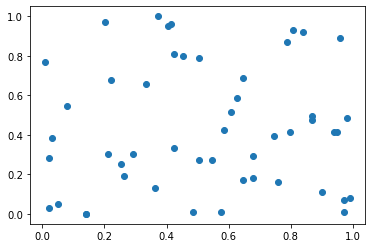

In [6]:
# normalization
# coding:utf-8
import numpy as np
import matplotlib.pyplot as plt
# 向量
# np.random.seed(666)
x = np.random.randint(0, 100, size=100)
xScale = (x - np.min(x)) / (np.max(x) - np.min(x))
print("The random list is:\n", x)
print("The maximum in x is:\n", np.max(x))
print("The minimum in x is:\n", np.min(x))
print("The normalized x is:\n", xScale)
# 二维数组(50个样本，2个特征)
X = np.random.randint(0, 100, size=(50, 2))
XScale = (X - np.min(X)) / (np.max(X) - np.min(X))
print("The random list is:\n", X)
print("The maXimum in X is:\n", np.max(X))
print("The minimum in X is:\n", np.min(X))
print("The normalized X is:\n", XScale)
print("The mean value of X is:\n", np.mean(X))
print("The mean value of scaled X is:\n", np.mean(XScale))
print("The std of X is:\n", np.std(X))
print("The std of scaled X is:\n", np.std(XScale))
plt.scatter(XScale[:, 0], XScale[:, 1])
plt.show()


In [9]:
# coding:utf-8
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=666)
standardScaler = StandardScaler()
standardScaler.fit(X_train)
print("mean value of data:\n", standardScaler.mean_)
print("standard deviation of data:\n", standardScaler.scale_)
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)
kNN_classifier = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
kNN_classifier.fit(X_train_standard, y_train)
score = kNN_classifier.score(X_test_standard, y_test)
print("The score of standarized data is:\n", score)


mean value of data:
 [5.83416667 3.08666667 3.70833333 1.17      ]
standard deviation of data:
 [0.81019502 0.44327067 1.76401924 0.75317107]
The score of standarized data is:
 1.0
